In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:/Dixant/CDAC/Machine Learning/LAB GRADED/HCLTECH.csv")

In [4]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,2020-11-23,HCLTECH,EQ,819.25,825.0,842.00,816.25,838.50,839.20,832.35,7116516,5.923459e+14,139507.0,2607441.0,0.3664
5194,2020-11-24,HCLTECH,EQ,839.20,843.9,857.40,835.35,841.00,840.50,847.95,8465615,7.178406e+14,169850.0,2882146.0,0.3405
5195,2020-11-25,HCLTECH,EQ,840.50,840.5,846.00,822.50,825.00,824.70,829.08,5610232,4.651325e+14,124023.0,2224611.0,0.3965
5196,2020-11-26,HCLTECH,EQ,824.70,824.1,845.00,819.60,841.20,842.05,834.43,8414555,7.021383e+14,138751.0,2752455.0,0.3271


In [5]:
df=pd.DataFrame(data['Prev Close'])

In [6]:
df

,Prev Close
0,580.00
1,1554.45
2,1678.85
3,1813.20
4,1958.30
...,...
5193,819.25
5194,839.20
5195,840.50
5196,824.70


In [7]:
data.Timestamp = pd.to_datetime(data.Date,format='%Y-%m-%d')
df.index = data.Timestamp

In [8]:
#df = df.resample('M').mean()

In [9]:
df

,Prev Close
Date,
2000-01-11,580.00
2000-01-12,1554.45
2000-01-13,1678.85
2000-01-14,1813.20
2000-01-17,1958.30
...,...
2020-11-23,819.25
2020-11-24,839.20
2020-11-25,840.50


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5198 entries, 2000-01-11 to 2020-11-27
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prev Close  5198 non-null   float64
dtypes: float64(1)
memory usage: 81.2 KB


In [11]:
df.describe()

,Prev Close
count,5198.000000
mean,636.039727
std,413.306168
min,89.700000
25%,311.550000
50%,517.125000
75%,877.225000
max,2819.150000


<AxesSubplot:xlabel='Date'>

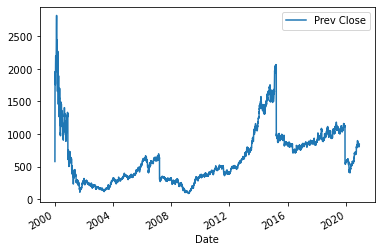

In [12]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['Prev Close'])
test_result

(-4.023837952855129,
 0.0012907058197707806,
 33,
 5164,
 {'1%': -3.431616954601018, '5%': -2.86209986084596, '10%': -2.56706801393458},
 48833.8741194518)

In [15]:
df['Seasonal_Difference']=df['Prev Close']-df['Prev Close'].shift(1)
## Again test dickey fuller test
test_result=adfuller(df['Seasonal_Difference'].dropna())
test_result


(-15.763872864896225,
 1.1828348703235796e-28,
 33,
 5163,
 {'1%': -3.4316172001143523,
  '5%': -2.8620999693139497,
  '10%': -2.567068071676066},
 48832.71871212932)

In [16]:
import statsmodels.api as sm

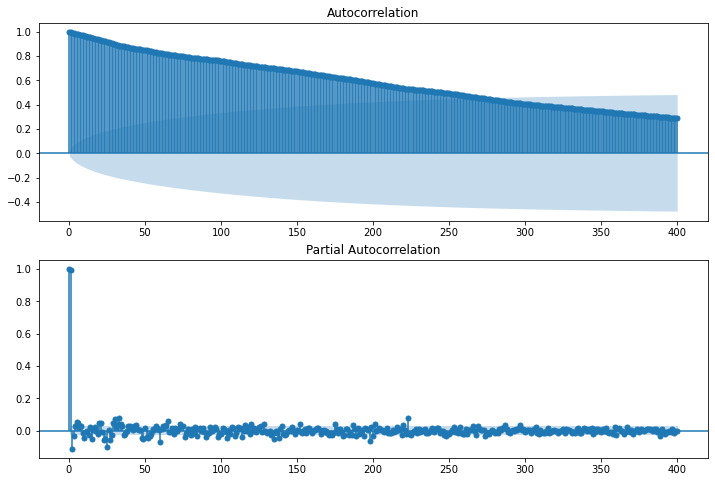

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Prev Close'], lags=400, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Prev Close'], lags=400, ax=ax2)


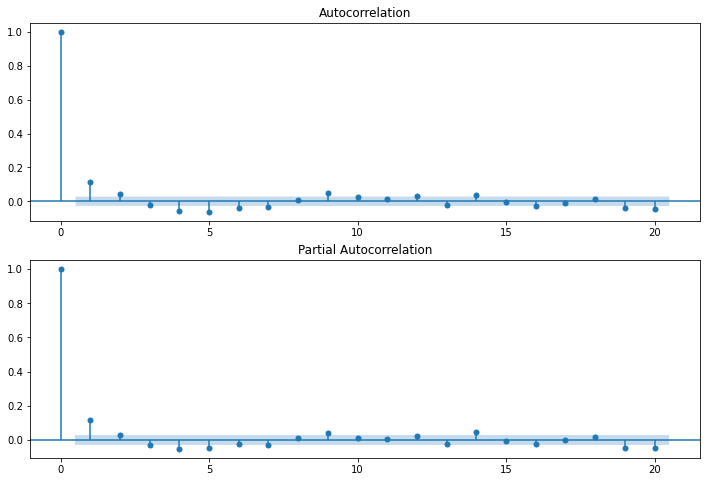

In [18]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal_Difference'].dropna(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal_Difference'].dropna(), lags=20, ax=ax2)


In [19]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
# fit model
ARMAmodel = ARMA(df['Prev Close'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [20]:
actuals = df['Prev Close'][5192:5198]
actuals

Date
2020-11-20    804.55
2020-11-23    819.25
2020-11-24    839.20
2020-11-25    840.50
2020-11-26    824.70
2020-11-27    842.05
Name: Prev Close, dtype: float64

In [21]:
ypredicted = ARmodel_fit.predict(5192,5197) # end point included
print(ypredicted)

Date
2020-11-20    813.888250
2020-11-23    802.739949
2020-11-24    820.689835
2020-11-25    840.816454
2020-11-26    839.701625
2020-11-27    822.084907
dtype: float64


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)

MAE: 13.273606


In [23]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(df['Prev Close'],order=parameters)
        results = mod.fit()
        ypredicted = results.predict(5192,5197) # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARMA{} - MAE:{}'.format(parameters, mae))
        #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue
        

ARMA(0, 0) - MAE:192.33527318199322


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(0, 1) - MAE:101.45412498190662
ARMA(1, 0) - MAE:13.320608838680092


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no ass

ARMA(1, 1) - MAE:13.273606297842283


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(1, 2) - MAE:13.598395032395464


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(1, 3) - MAE:13.611308093685997


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(2, 0) - MAE:13.417607771236021


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(2, 1) - MAE:13.51706555407867


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(2, 2) - MAE:13.60413945945614


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(2, 3) - MAE:13.537810474291518


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(3, 0) - MAE:13.575553029908955


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided

ARMA(3, 1) - MAE:13.39621454789409


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARMA(3, 2) - MAE:13.734505953765392


In [30]:
ARMAmodel = ARMA(df['Prev Close'], order=(1, 1))
ARmodel_fit = ARMAmodel.fit()
ypredicted = ARmodel_fit.predict(5192,5197)
print(ypredicted)
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARmodel_fit.aic)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Date
2020-11-20    813.888250
2020-11-23    802.739949
2020-11-24    820.689835
2020-11-25    840.816454
2020-11-26    839.701625
2020-11-27    822.084907
dtype: float64
MAE: 13.273606
50823.96100863927


In [31]:
actuals

Date
2020-11-20    804.55
2020-11-23    819.25
2020-11-24    839.20
2020-11-25    840.50
2020-11-26    824.70
2020-11-27    842.05
Name: Prev Close, dtype: float64

In [32]:
# make prediction
ypredicted = ARmodel_fit.predict(len(df), len(df)+3,typ='levels')
print(ypredicted)

5198    843.841333
5199    843.070167
5200    842.302069
5201    841.537027
dtype: float64


C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
ARIMAmodel = ARIMA(df['Prev Close'], order=(1, 1, 1)) 
ARIMA_model_fit = ARIMAmodel.fit()

ypredicted = ARIMA_model_fit.predict(len(df)-3, len(df)-1, typ='levels')
print(ypredicted)

C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\divya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Date
2020-11-25    842.290151
2020-11-26    841.201231
2020-11-27    822.691851
dtype: float64


In [29]:
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARIMA_model_fit.aic)

ValueError: Found input variables with inconsistent numbers of samples: [6, 3]

In [ ]:
# make prediction
ypredicted = ARIMA_model_fit.predict(len(df), len(df)+3, typ='levels')
print(ypredicted)

In [ ]:
import itertools
p= d = q = range(0, 4)
pdq = itertools.product(p,d,q)
for parameters in pdq:
    try:
        ARIMAmodel = ARIMA(df['Prev Close'], order=parameters)
        results = ARIMAmodel.fit()
        ypredicted = results.predict(5195,5197) # end point included
        mae = mean_absolute_error(actuals, ypredicted)
        print('ARIMA{} - MAE:{}'.format(parameters, mae))
    #print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

In [ ]:
ARIMAmodel = ARIMA(df['Prev Close'], order=(1, 0, 0)) 
ARIMA_model_fit = ARIMAmodel.fit()

ypredicted = ARIMA_model_fit.predict(len(df)-3, len(df)-1, typ='levels')
print(ypredicted)

In [ ]:
mae = mean_absolute_error(actuals, ypredicted)
print('MAE: %f' % mae)
print(ARIMA_model_fit.aic)

In [ ]:
# make prediction
ypredicted = ARIMA_model_fit.predict(len(df), len(df)+3, typ='levels')
print(ypredicted)